In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Calculate the Euclidean distance
def euclidean_distance(a, b):
    b = np.array(b)[0:2]
    return np.linalg.norm(a - b)

# Locate most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for index, train_row in train.iterrows():
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a prediction with neighbors
def classify(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
    
def knn(train, test, num_neighbors):
    predictions = []
    for row in test:
        output = classify(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

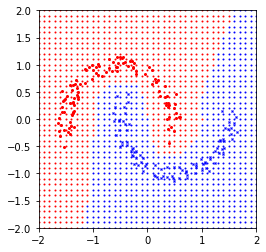

In [6]:
df = pd.read_csv('data/D2z.txt', sep=" ", header=None)
df.columns = ['x1', 'x2', 'y']
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
x1_test = []
x2_test = []
for i, idx in enumerate(np.arange(-2, 2.1, 0.1)):
    for j, jdx in enumerate(np.arange(-2, 2.1, 0.1)):
        x1_test.append(idx)
        x2_test.append(jdx)
x1_test = np.array(x1_test)
x2_test = np.array(x2_test)
test = np.vstack((x1_test, x2_test)).T

prediction = np.array(knn(df, test, 1))
test = np.append(test, prediction.reshape(1681,1), 1)

x1_test_pos = test[test[:, 2]==1][:, 0]
x2_test_pos = test[test[:, 2]==1][:, 1]

x1_test_neg = test[test[:, 2]==0][:, 0]
x2_test_neg = test[test[:, 2]==0][:, 1]

x1_train_pos = np.array(df[df['y'] == 1]['x1'])
x2_train_pos = np.array(df[df['y'] == 1]['x2'])
x1_train_neg = np.array(df[df['y'] == 0]['x1'])
x2_train_neg = np.array(df[df['y'] == 0]['x2'])
fig, ax = plt.subplots()
plt.plot(x1_test_pos, x2_test_pos, '.', color='red', markersize=2)
plt.plot(x1_test_neg, x2_test_neg, '.', color='blue', markersize=2)
plt.plot(x1_train_pos, x2_train_pos, 'o', color='red', markersize=2)
plt.plot(x1_train_neg, x2_train_neg, 'x', color='blue', markersize=2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
ax.set_aspect('equal')
plt.show()